# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
NUM_OF_CLASSES = len(set(y_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,611,90,49,85,141,57,11,159,43,20,167,173,365,186,75,1,11,182,192
1,177,89,44,72,160,66,7,144,46,19,147,166,312,169,69,11,1,191,198
2,14,94,49,79,203,71,5,174,37,21,154,196,465,206,71,6,2,197,199
3,356,91,45,76,171,69,7,150,44,19,144,170,340,179,69,12,1,195,201
4,336,89,44,76,125,54,10,156,44,20,151,163,352,176,76,12,12,184,193
5,762,90,44,69,152,64,7,135,49,18,145,165,272,162,75,3,2,187,191
6,584,100,51,89,199,65,6,201,32,23,159,219,622,205,74,6,7,193,193
7,89,80,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184
8,224,86,41,66,133,56,6,136,49,18,136,155,274,162,74,5,14,183,189
9,10,86,36,70,143,61,9,133,50,18,130,153,266,127,66,2,10,194,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.451730,93.513661,45.018215,82.214936,168.996357,61.868852,8.670310,169.202186,40.830601,20.606557,148.335155,189.428051,441.801457,175.956284,72.839709,6.340619,12.522769,188.797814,195.535519
std,246.978278,8.159132,6.128463,15.877878,33.519414,8.216122,5.010814,33.320402,7.727716,2.599486,14.336056,31.764600,177.665823,32.610311,7.827974,4.883927,9.187718,6.077444,7.372339
min,1.000000,73.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,134.000000,193.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,207.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,440.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,178.000000,361.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,640.000000,100.000000,50.000000,98.000000,196.000000,66.000000,10.000000,199.000000,46.000000,23.000000,160.000000,217.000000,595.000000,200.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,182.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import StandardScaler

* make parameters float

In [7]:
X_train = X_train.astype('float')
X_test  = X_test.astype('float')

* Make scaling

In [8]:
scaler = StandardScaler()

X_train_normed = scaler.fit_transform(X_train)
X_test_normed = scaler.transform(X_test)

In [9]:
pd.DataFrame(X_train_normed).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,-7.482377e-17,5.401468e-16,-7.482377e-17,1.337222e-16,1.445413e-16,-3.009129e-16,-2.618832e-17,9.514753e-17,1.122357e-16,-4.575878e-16,1.120334e-16,-2.481318e-16,1.417607e-16,-1.447846e-16,5.169918e-16,-1.488386e-16,-4.853434e-18,-5.191152e-16,-7.837285e-16
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.724199e+00,-2.516489e+00,-1.962837e+00,-2.408999e+00,-1.940834e+00,-1.811367e+00,-1.332397e+00,-1.658219e+00,-1.920894e+00,-1.388677e+00,-2.117934e+00,-1.746554e+00,-1.401667e+00,-2.055097e+00,-1.513866e+00,-1.299446e+00,-1.364233e+00,-2.107709e+00,-1.973427e+00
25%,-8.893570e-01,-7.990558e-01,-8.195842e-01,-7.700069e-01,-8.359899e-01,-5.931378e-01,-3.336450e-01,-6.669317e-01,-1.014238e+00,-6.185924e-01,-7.215778e-01,-6.752043e-01,-6.805565e-01,-7.659861e-01,-6.188220e-01,-8.895665e-01,-8.195320e-01,-7.901660e-01,-7.515346e-01
50%,5.490615e-02,-6.301279e-02,-1.662968e-01,-2.026636e-01,-8.947321e-02,-1.058461e-01,-1.338946e-01,-3.965806e-01,2.809856e-01,-6.185924e-01,-1.630354e-01,-3.601013e-01,-4.552094e-01,-6.004445e-02,-1.073681e-01,-6.980652e-02,-1.658907e-01,-1.313944e-01,6.306065e-02
75%,8.654325e-01,7.957040e-01,8.136344e-01,9.950612e-01,8.063467e-01,5.032684e-01,2.656061e-01,8.950969e-01,6.695527e-01,9.215765e-01,8.144139e-01,8.688003e-01,8.630712e-01,7.379765e-01,4.040859e-01,5.450135e-01,5.966907e-01,6.920703e-01,7.418900e-01
max,1.696222e+00,3.126507e+00,2.120209e+00,1.877595e+00,4.897258e+00,9.274518e+00,9.254373e+00,2.877672e+00,2.353343e+00,3.231830e+00,2.350406e+00,4.114361e+00,3.246117e+00,2.825108e+00,7.948031e+00,3.209233e+00,3.102316e+00,2.833078e+00,2.099549e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [10]:
import scikitplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from tqdm import tqdm

In [11]:
def make_random_grid(grid):
    random_grid = {}
    for key, values in grid.items():
        random_grid[key] = np.random.choice(values)
        
    return random_grid

* > Find optimal hyperparameters for logistic regression with cross-validation on the train data (small grid/random search is enough, no need to find the best parameters).

In [12]:
grid = {
    "C" : np.logspace(-2,1,20),
    "penalty" : ["l1","l2"],
    "multi_class" : ['multinomial'],
    "tol" : [1e-3],
    "max_iter" : [600],
    "solver" : ['saga']
}
rs_iter_num = 40

In [13]:
best_params = {}
best_val_score = -1

for _ in tqdm(range(rs_iter_num)):
    lr = LogisticRegression()
    lr.set_params(**make_random_grid(grid))
    lr.fit(X_train_normed, y_train)
    
    predicted = cross_val_predict(lr, X_train_normed, y_train, cv=10)
    cur_val_score = metrics.accuracy_score(y_train, predicted)
    if cur_val_score > best_val_score:
        best_val_score = cur_val_score
        best_params = lr.get_params()
        
print("The best accuracy is {}%".format(best_val_score * 100))
print("With params: ", best_params)

100%|██████████| 40/40 [00:35<00:00,  1.13it/s]

The best accuracy is 80.87431693989072%
With params:  {'C': 4.832930238571752, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 600, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.001, 'verbose': 0, 'warm_start': False}


* > Estimate the model quality with f1 and accuracy scores.

**F1 score** for train/test data

In [14]:
best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train_normed, y_train)

predicted_train = best_lr.predict(X_train_normed)
print("F1 score for classes in train data is: ", metrics.f1_score(y_train, predicted_train, average='macro'),sep='\n')

predicted_test = best_lr.predict(X_test_normed)
print("F1 score for classes in test data is: ", metrics.f1_score(y_test, predicted_test, average='macro'),sep='\n')

F1 score for classes in train data is: 
0.8528342754545921
F1 score for classes in test data is: 
0.7891496537675358


**Accuracy** for train/test data

In [15]:
best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train_normed, y_train)

print("Accuracy score for classes in train data is: ", metrics.accuracy_score(y_train, predicted_train),sep='\n')

predicted_test = best_lr.predict(X_test_normed)
print("Accuracy score for classes in test data is: ", metrics.accuracy_score(y_test, predicted_test),sep='\n')

Accuracy score for classes in train data is: 
0.8579234972677595
Accuracy score for classes in test data is: 
0.7777777777777778


* > Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

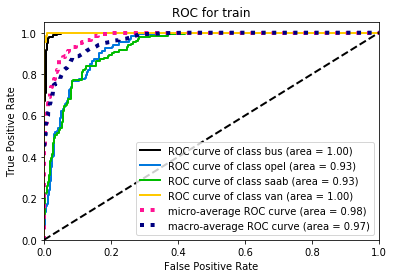

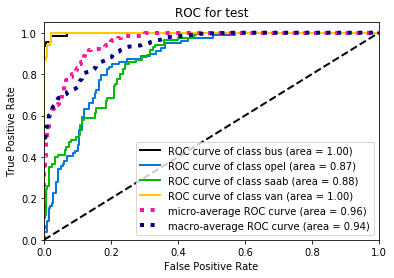

In [16]:
best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train_normed, y_train)

predicted_train_proba = best_lr.predict_proba(X_train_normed)
scikitplot.metrics.plot_roc(y_train, predicted_train_proba, title='ROC for train')

predicted_test_proba = best_lr.predict_proba(X_test_normed)
scikitplot.metrics.plot_roc(y_test, predicted_test_proba, title='ROC for test')
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [17]:
from sklearn.decomposition import PCA

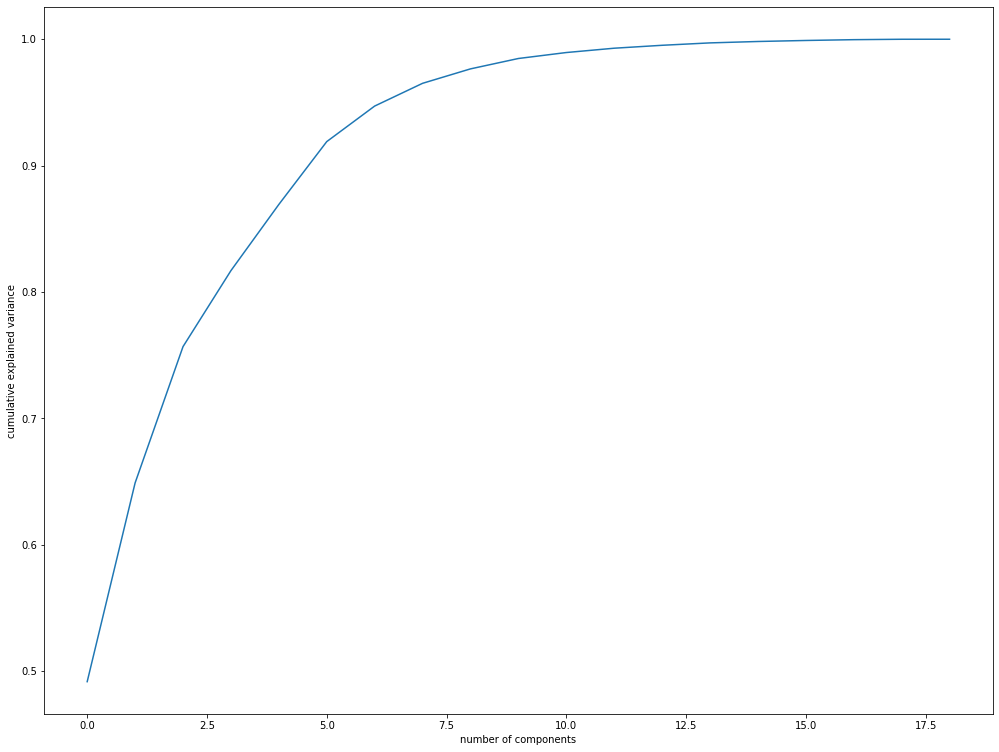

In [18]:
pca = PCA().fit(X_train_normed)
plt.figure(figsize=(17, 13))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

* >Select the appropriate number of components.

In [19]:
components_number = 10
print("Total variance for picked components is", np.sum(pca.explained_variance_ratio_[:components_number]))

Total variance for picked components is 0.9847663336565755


* > Briefly explain your choice

Because we cover 98% of variance 

* > Should you normalize the data?

Yes, we sould normalize the data before applying PCA. Otherwise we will be fitted on the biggest feature. 

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [21]:
pline = Pipeline([
    ('ss', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('lr', LogisticRegression(solver='saga', max_iter=600, multi_class='multinomial', tol=1e-3))
])

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

* > Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

In [22]:
grid = {'lr__penalty': ['l1', 'l2'], 'lr__C' : np.logspace(-2, 1, 30)}
grid_s = GridSearchCV(pline, grid, n_jobs=-1, cv=10, iid=True)
grid_s.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=10, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                 

* > Estimate the model quality with `f1` and `accuracy` scores.

In [23]:
best_model = grid_s.best_estimator_
print("Best params:")
for param in grid_s.best_params_:
    value =  grid_s.best_params_[param]
    print("\t" + param + " = " + str(value))

print("\nAnd scores on train data:")
print("\t accuracy = {}".format(metrics.accuracy_score(y_train, best_model.predict(X_train))))
print("\t f1-score = {}".format(metrics.f1_score(y_train, best_model.predict(X_train), average='macro')))


print("\nAnd scores on test data:")
print("\t accuracy = {}".format(metrics.accuracy_score(y_test, best_model.predict(X_test))))
print("\t f1-score = {}".format(metrics.f1_score(y_test, best_model.predict(X_test), average='macro')))

Best params:
	lr__C = 0.4520353656360243
	lr__penalty = l2

And scores on train data:
	 accuracy = 0.7449908925318761
	 f1-score = 0.7312834472503158

And scores on test data:
	 accuracy = 0.6902356902356902
	 f1-score = 0.6980301955219174


* > Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).


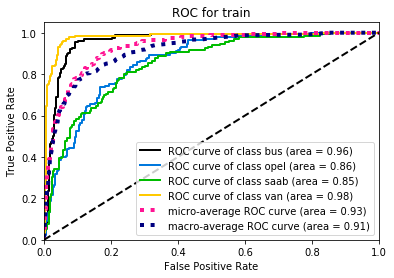

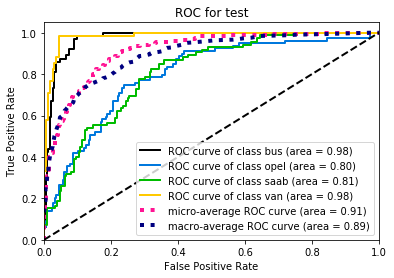

In [24]:
predicted_train_proba = best_model.predict_proba(X_train)
scikitplot.metrics.plot_roc(y_train, predicted_train_proba, title='ROC for train')

predicted_test_proba = best_model.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, predicted_test_proba, title='ROC for test')
plt.show()


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [25]:
from sklearn.tree import DecisionTreeClassifier

pline = Pipeline([
    ('ss', StandardScaler()),
    ('dtc', DecisionTreeClassifier())
])


In [26]:
grid_params = {'dtc__max_depth': np.arange(1, 100)}
grid_s = GridSearchCV(pline, grid_params, n_jobs=-1, cv=10, iid=True)
grid_s.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('dtc',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
              

* > Estimate the model quality with `f1` and `accuracy` scores.

In [27]:
best_model = grid_s.best_estimator_
print("Best params:")
for param in grid_s.best_params_:
    value =  grid_s.best_params_[param]
    print("\t" + param + " = " + str(value))

print("\nAnd scores on train data:")
print("\t accuracy = {}".format(metrics.accuracy_score(y_train, best_model.predict(X_train))))
print("\t f1-score = {}".format(metrics.f1_score(y_train, best_model.predict(X_train), average='macro')))


print("\nAnd scores on test data:")
print("\t accuracy = {}".format(metrics.accuracy_score(y_test, best_model.predict(X_test))))
print("\t f1-score = {}".format(metrics.f1_score(y_test, best_model.predict(X_test), average='macro')))

Best params:
	dtc__max_depth = 5

And scores on train data:
	 accuracy = 0.8306010928961749
	 f1-score = 0.8213202910773115

And scores on test data:
	 accuracy = 0.6599326599326599
	 f1-score = 0.6539760348583877


* > Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).


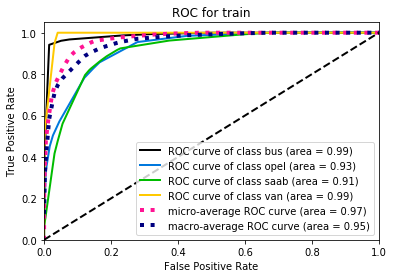

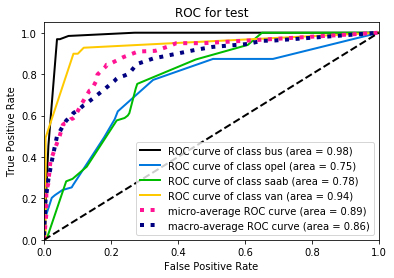

In [28]:
predicted_train_proba = best_model.predict_proba(X_train)
scikitplot.metrics.plot_roc(y_train, predicted_train_proba, title='ROC for train')

predicted_test_proba = best_model.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, predicted_test_proba, title='ROC for test')
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [30]:
from sklearn.ensemble import BaggingClassifier

##### 2.6.1 Bagging logistic regressions

* Find optimal hyperparameters

In [45]:
pline = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(solver='saga', max_iter=600, multi_class='multinomial', tol=1e-3))
])

In [47]:
grid = {'lr__penalty': ['l1', 'l2'], 'lr__C' : np.linspace(0.01, 10, 40)}
grid_s = GridSearchCV(pline, grid, n_jobs=-1, cv=10, iid=True)
grid_s.fit(X_train, y_train)
best_lr = grid_s.best_estimator_

* Train baggin classifier and save `f1` and `accuracy`

In [50]:
estimators_num = np.arange(2, 100, 5)
f1_history = []
accuracy_history = []

for n_estimators in estimators_num:
    b_clf = BaggingClassifier(base_estimator=best_lr, n_estimators=n_estimators, bootstrap=True)
    b_clf.fit(X_train, y_train)
    predictions = b_clf.predict(X_test)

    accuracy_history.append(metrics.accuracy_score(y_test, predictions))
    f1_history.append(metrics.f1_score(y_test, predictions, average='macro'))

optimal_n_estimators = estimators_num[np.argmax(f1_history)]
print("Optimal number of estimators: ", optimal_n_estimators)

Optimal number of estimators:  7


* Plot `f1` and `accuracy`

In [55]:
best_lr.fit(X_train, y_train)
predictions = best_lr.predict(X_test)
f1_best_lr = metrics.f1_score(y_test, predictions, average='macro')
accuracy_best_lr = metrics.accuracy_score(y_test, predictions)

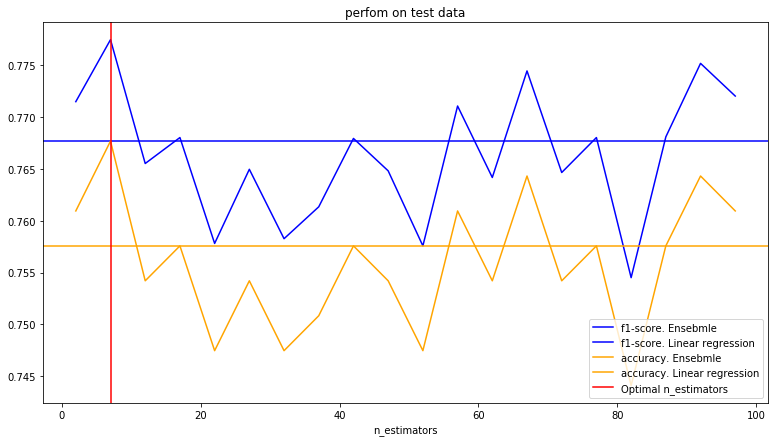

In [62]:
plt.figure(figsize=(13, 7))
plt.title('perfom on test data')
plt.xlabel('n_estimators')

plt.plot(estimators_num, f1_history, label='f1-score. Ensebmle', color='blue')
plt.axhline(f1_best_lr, color='blue', label='f1-score. Linear regression')

plt.plot(estimators_num, accuracy_history, label='accuracy. Ensebmle', color='orange')
plt.axhline(accuracy_best_lr, color='orange', label='accuracy. Linear regression')

plt.axvline(optimal_n_estimators, color='red', label='Optimal n_estimators')

plt.legend()
plt.show()

* Plot analysis

The optimal number of estimators is 7. But they are almost the same and have perfom difference $\pm0.015$

##### 2.6.2 Bagging logistic regressions

* Find optimal hyperparameters

In [65]:
pline = Pipeline([
    ('ss', StandardScaler()),
    ('dtc', DecisionTreeClassifier())
])

In [66]:
grid_params = {'dtc__max_depth': np.arange(1, 100)}
grid_s = GridSearchCV(pline, grid_params, n_jobs=-1, cv=10, iid=True)
grid_s.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('dtc',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
              

In [68]:
best_tree = grid_s.best_estimator_
print("Best params:")
for param in grid_s.best_params_:
    value =  grid_s.best_params_[param]
    print("\t" + param + " = " + str(value))

Best params:
	dtc__max_depth = 5


* Train baggin classifier and save `f1` and `accuracy`

In [70]:
estimators_num = np.arange(2, 100, 5)
f1_history = []
accuracy_history = []

for n_estimators in estimators_num:
    b_clf = BaggingClassifier(base_estimator=best_tree, n_estimators=n_estimators, bootstrap=True)
    b_clf.fit(X_train, y_train)
    predictions = b_clf.predict(X_test)

    accuracy_history.append(metrics.accuracy_score(y_test, predictions))
    f1_history.append(metrics.f1_score(y_test, predictions, average='macro'))

optimal_n_estimators = estimators_num[np.argmax(f1_history)]
print("Optimal number of estimators: ", optimal_n_estimators)

Optimal number of estimators:  12


* Plot `f1` and `accuracy`

In [71]:
best_tree.fit(X_train, y_train)
predictions = best_tree.predict(X_test)
f1_best_tree = metrics.f1_score(y_test, predictions, average='macro')
accuracy_best_tree = metrics.accuracy_score(y_test, predictions)

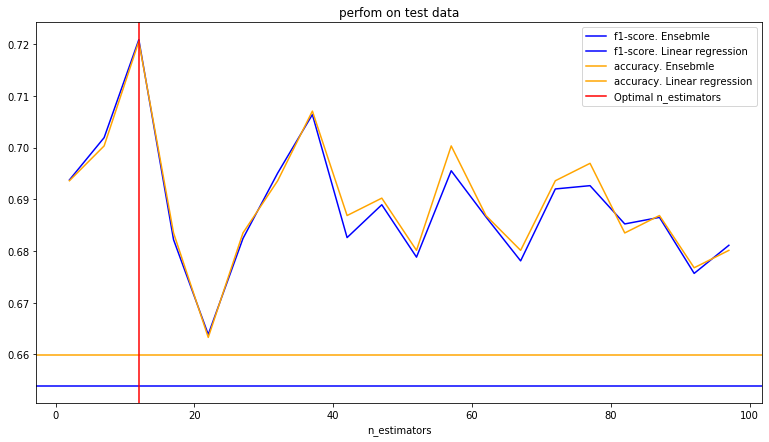

In [72]:
plt.figure(figsize=(13, 7))
plt.title('perfom on test data')
plt.xlabel('n_estimators')

plt.plot(estimators_num, f1_history, label='f1-score. Ensebmle', color='blue')
plt.axhline(f1_best_tree, color='blue', label='f1-score. Linear regression')

plt.plot(estimators_num, accuracy_history, label='accuracy. Ensebmle', color='orange')
plt.axhline(accuracy_best_tree, color='orange', label='accuracy. Linear regression')

plt.axvline(optimal_n_estimators, color='red', label='Optimal n_estimators')

plt.legend()
plt.show()

* Plot analysis

The optimal number of estimators is 12. I think that optimal depth for single tree is not optimal for ensebmle, because by stacking models we reduce variance, not bias, and trees with depth 5 have bigger bias

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [74]:
from sklearn.ensemble import RandomForestClassifier

* Train forsets and save `f1` and `accuracy` w.r.t the number of trees

In [75]:
estimators_num = np.arange(2, 100, 5)
f1_history = []
accuracy_history = []

for n_estimators in estimators_num:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_test)

    accuracy_history.append(metrics.accuracy_score(y_test, predictions))
    f1_history.append(metrics.f1_score(y_test, predictions, average='macro'))

optimal_n_estimators = estimators_num[np.argmax(f1_history)]
print("Optimal number of estimators: ", optimal_n_estimators)

Optimal number of estimators:  92


* Plot `f1` and `accuracy`

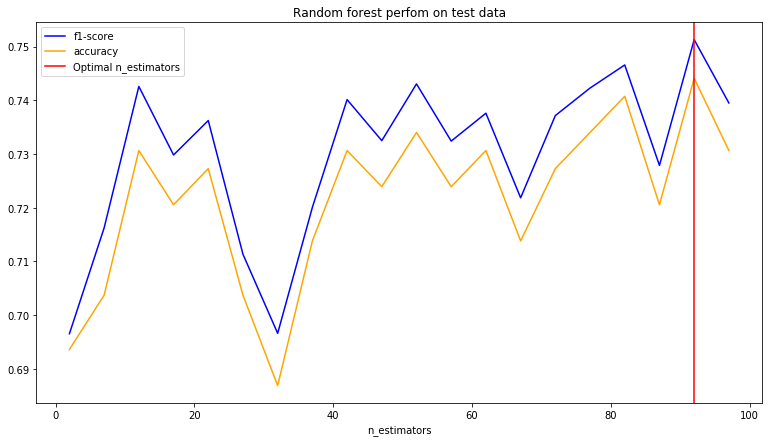

In [76]:
plt.figure(figsize=(13, 7))
plt.title('Random forest perfom on test data')
plt.xlabel('n_estimators')

plt.plot(estimators_num, f1_history, label='f1-score', color='blue')

plt.plot(estimators_num, accuracy_history, label='accuracy', color='orange')

plt.axvline(optimal_n_estimators, color='red', label='Optimal n_estimators')

plt.legend()
plt.show()

* Plot analysis

The optimal number of estimators is 92. Its much bigger then for bagging of trees. Because in random forest we use trees with bigger depth and therefore have lower bias

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE